In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

        code broader                           label_en
0          1     NaN                            Cereals
1       1.01       1                              Wheat
2       1.02       1                              Maize
3       1.03       1                               Rice
4       1.04       1                            Sorghum
..       ...     ...                                ...
191  9.05.02    9.05             Permanent flower crops
192     9.06       9                            Tobacco
193      9.9       9                Other crops, n.e.c.
194  9.90.01     9.9  Other crops, n.e.c. â temporary
195  9.90.02     9.9  Other crops, n.e.c. â permanent

[196 rows x 3 columns]
{'1.01': 'Wheat', '1.02': 'Maize', '1.03': 'Rice', '1.04': 'Sorghum', '1.05': 'Barley', '1.06': 'Rye', '1.07': 'Oats', '1.08': 'Millet', '1.09': 'Triticale', '1.1': 'Buckwheat', '1.11': 'Fonio', '1.12': 'Quinoa', '1.13': 'Canary seed', '1.14': 'Mixed cereals', '1.9': 'Other cereals, n.e.c.', '2.01': 'Le

/tmp/ipykernel_29179/4203158899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEVEL_0.drop(['broader'],axis=1,inplace=True)
/tmp/ipykernel_29179/4203158899.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEVEL_1.drop(['broader'],axis=1,inplace=True)


NameError: name 'df_icc_2' is not defined

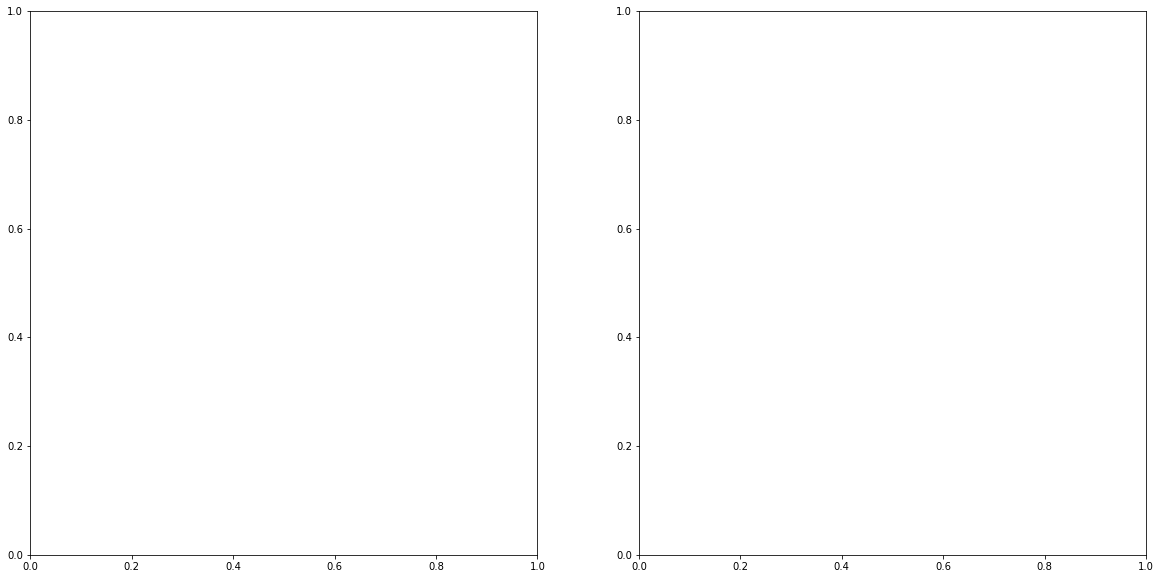

In [5]:
icc_df = pd.read_csv("/home/BTemple-Boyer-Dury/Documents/Classificrops/data/ICC/ICC_src.csv", encoding= 'unicode_escape')
icc_df['code'] = icc_df['code'].astype('str')
print(icc_df)
mask_0 = (icc_df['code'].str.len() == 1)
LEVEL_0 = icc_df.loc[mask_0]
LEVEL_0.drop(['broader'],axis=1,inplace=True)
LEVEL_0.set_index('code', inplace = True)
d_icc_0 = LEVEL_0.to_dict('dict')
group_dict_icc_0 = d_icc_0['label_en']
mask_1 = (icc_df['broader'].str.len() == 1)
LEVEL_1 = icc_df.loc[mask_1]
LEVEL_1.drop(['broader'],axis=1,inplace=True)
LEVEL_1.set_index('code', inplace = True)
d_icc_1 = LEVEL_1.to_dict('dict')
group_dict_icc_1 = d_icc_1['label_en']
print(group_dict_icc_1)
other_detailed = LEVEL_1.iloc[lambda x: x.index.str[:1] == '9']
string = ', '.join(other_detailed.label_en)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.pie(df_icc_2['per'], autopct=autopct) #plot first pie

ax2.pie(df_icc_3['per'], autopct=autopct) #plot second pie

ax1.set_title('Pyrénées-Orientales')
ax2.set_title('Girona')
#if df_icc_2.loc[ 'Other crops' ,'per'] > 10 or df_icc_3.loc[ 'Other crops' ,'per'] > 10:
#    df_icc_2.rename(index = lambda x: x + ' : ' + string if x == 'Other crops' else x, inplace=True)
fig.legend(df_icc_2.index, loc=8, title = "ICC classification")
#if df_icc_2['per']